# PySuggestify

## Example of building recommendation system for movies

At first, import necessary modules.

From PySuggestify we import class PMF, which is simple implementation of Probabilitic Matrix Factorization.

In [1]:
import pandas as pd
import numpy as np

from pysuggestify.PMF import PMF

Let's load the data.

The dataframe contains the movie ID, user ID and rating of the movie by the given user on a scale of 1-10.

In [2]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating
0,1,1,8.0
1,1,3,8.0
2,1,6,8.0
3,1,47,10.0
4,1,50,10.0


Let's take a look at what our dataframe contains.<br>

In [3]:
print(' Number of users:', np.unique(ratings['userId']).shape[0])
print('Number of movies:', np.unique(ratings['movieId']).shape[0])

 Number of users: 610
Number of movies: 9724


We have **610 users** who can rate **9724 movies**. Of course, each user only saw some of them.

Let's assume that we are the owners of a streaming service and we want to offer our users the most suitable movies. How to do it?

We can use popular algorithm named **Probability Matrix Factorization**!

If you created a matrix of movie ratings by users, it would be very large and mostly filled with gaps (rather no one is able to watch all movies). In PMF, the idea is to factorize or break down the user-item matrix into two smaller matrices: one for users and another for items. This is like breaking down the big matrix into smaller pieces to extract useful information.<br>
By doing this factorization, PMF tries to find hidden or latent space in the data. These latent space capture underlying patterns or characteristics that influence user preferences. For example, in a movie recommendation system, these latent features could represent genres like action, romance, or comedy.

Using this algorithm, we can *fill gaps* in our rating matrix and thus find out what is **the expected rating of a given movie is for each user**.

Let's see how we can use PySuggestify for that!

At first, let's create instance od `PMF` class.<br>
We need to set the dimension of latent space and the regularization parameter befor we start training our model.<br>
The larger the latent space dimension, the more accurate results can be obtained. We use `n_dims = 40`.

In [4]:
PMF_model = PMF(n_dims = 40, lambda_U = 0.3, lambda_V = 0.3)

If we use the `prepare_data()` method, the data for training the model will be automatically prepared.
We only need to provide a dataframe as `ratings` in the example above, and indicate which columns are ID for users and items and which column contains ratings.

In [5]:
PMF_model.prepare_data(ratings, 'userId', 'movieId', 'rating')

Rating matrix prepared!
Number of users:  610
Number of items:  9724


Once we have the data ready, we can start training the model.

The only thig is to specify the number of iterations of the algorithm. The higher the number, the more accurate the results will be, but it will take more time to get them.

In [6]:
PMF_model.fit(n_epochs=50)

Epoch 1/50 
  Time: 6.2s, Log p posteriori: -624735.1215, RMSE: 2.8234
Epoch 2/50 
  Time: 6.3s, Log p posteriori: -141739.1549, RMSE: 1.1257
Epoch 3/50 
  Time: 6.4s, Log p posteriori: -93051.3433, RMSE: 0.8168
Epoch 4/50 
  Time: 6.5s, Log p posteriori: -73380.8777, RMSE: 0.6839
Epoch 5/50 
  Time: 6.5s, Log p posteriori: -62104.7708, RMSE: 0.6062
Epoch 6/50 
  Time: 6.8s, Log p posteriori: -54637.9614, RMSE: 0.5539
Epoch 7/50 
  Time: 6.4s, Log p posteriori: -49238.6703, RMSE: 0.5157
Epoch 8/50 
  Time: 6.4s, Log p posteriori: -45120.9461, RMSE: 0.4864
Epoch 9/50 
  Time: 6.4s, Log p posteriori: -41886.7305, RMSE: 0.463
Epoch 10/50 
  Time: 6.5s, Log p posteriori: -39281.0396, RMSE: 0.4438
Epoch 11/50 
  Time: 6.4s, Log p posteriori: -37123.1818, RMSE: 0.4278
Epoch 12/50 
  Time: 6.4s, Log p posteriori: -35298.2562, RMSE: 0.4141
Epoch 13/50 
  Time: 7.5s, Log p posteriori: -33732.5289, RMSE: 0.4025
Epoch 14/50 
  Time: 7.6s, Log p posteriori: -32372.5318, RMSE: 0.3923
Epoch 15/50 
 

The learning process can be verified on charts:

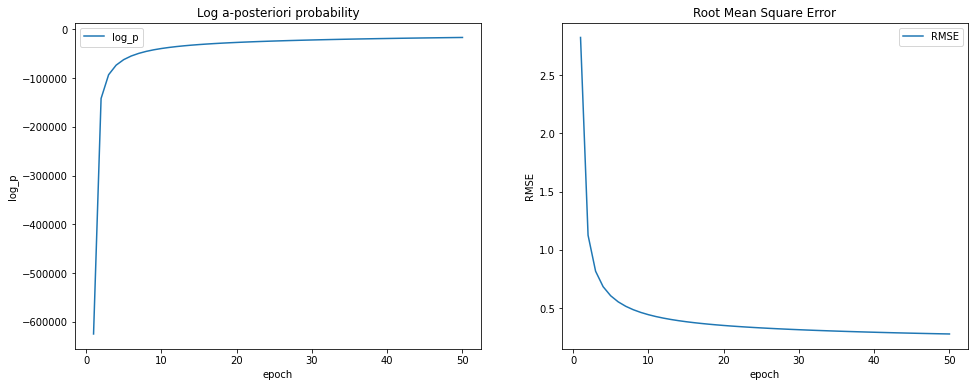

In [7]:
PMF_model.plot_history()

We can show the predictions.<br>
This array contains predicted ratings for each film and each user.

In [8]:
print(PMF_model.predict())

[[7.61285827 9.7008641  8.24477333 ... 1.         1.         1.        ]
 [7.36409559 6.60971559 8.73170649 ... 1.         1.         1.        ]
 [3.74121054 1.         1.44741694 ... 1.49265373 1.49265373 1.        ]
 ...
 [5.39949936 3.72039516 3.83382713 ... 1.         1.         1.        ]
 [6.0364435  3.50469717 4.25813621 ... 1.         1.         1.        ]
 [8.54859188 3.99996115 1.         ... 1.         1.         2.15478004]]


We can also examine the error of our model, i.e. how far from the truth it is.

In [9]:
print('-------------------------')
print('RMSE:', PMF_model.history['rmse'][-1])

-------------------------
RMSE: 0.27797442619788887


We can also get prediction for specific user and specific movie by passing them ID's.

In [10]:
round(PMF_model.predict_one(user_id=1, item_id=2))

10

According to our model, user 1 is likely to rate the video with id=2 with a rating of 10.

Function below compare true user rating with our predictions:

In [11]:
def compare_pred_vs_true(user_id, item_id):
    print('     True rating:', PMF_model.R[PMF_model.user_to_row[user_id], PMF_model.item_to_column[item_id]])
    print('Predicted rating:', PMF_model.predict_one(user_id=user_id, item_id=item_id))

compare_pred_vs_true(user_id=1, item_id=1)

     True rating: 8.0
Predicted rating: 7.612858270920231


We can copmare predictions for some random users ratings:

In [12]:
# Compare some predictions with true ratings
for i in range(10):
    row_sample = PMF_model.df.sample(1)
    user_id = row_sample['userId'].values[0]
    item_id = row_sample['movieId'].values[0]
    compare_pred_vs_true(user_id=user_id, item_id=item_id)
    print('\n')

     True rating: 10.0
Predicted rating: 10.0


     True rating: 9.0
Predicted rating: 8.227362600349798


     True rating: 2.0
Predicted rating: 2.032618706589141


     True rating: 10.0
Predicted rating: 9.912388552967919


     True rating: 10.0
Predicted rating: 9.88467252141719


     True rating: 4.0
Predicted rating: 4.316526464483501


     True rating: 6.0
Predicted rating: 5.924530344751906


     True rating: 10.0
Predicted rating: 9.889626359269368


     True rating: 7.0
Predicted rating: 6.980524520014333


     True rating: 4.0
Predicted rating: 3.812907609892198




We can also get information about predictions only for those movies that have not been rated by a given user.

We can treat it as a mask that will allow us to decide what movies, which he has not seen yet, to propose to each user.

Values 0 in this matrix mean that the user has already rated the movie. Other values show the predicted rating for the user-video pair.

In [13]:
print(PMF_model.get_masked_preds())

[[0.         9.7008641  0.         ... 1.         1.         1.        ]
 [7.36409559 6.60971559 8.73170649 ... 1.         1.         1.        ]
 [3.74121054 1.         1.44741694 ... 1.49265373 1.49265373 1.        ]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         3.50469717 4.25813621 ... 1.         1.         1.        ]
 [0.         3.99996115 1.         ... 1.         1.         2.15478004]]


Now, let's put our model into practice!

Let's try to find out the title of the movie that, according to our model, user xxx will like the most.<br>
To do this we have to read movies metadata.

In [14]:
movies_metadata = pd.read_csv('data/movies.csv')
movies_metadata.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Take a look on user with `userId=435`<br>
Which row corresponds to this user?

In [15]:
test_user_id = 435
print(PMF_model.user_to_row[test_user_id])

434


Now we can check the column number with the highest predicted score and how high is that score.

In [16]:
print(PMF_model.get_masked_preds()[PMF_model.user_to_row[test_user_id]].argmax())

92


In [18]:
print('Highest score:', PMF_model.get_masked_preds()[434][92])

Highest score: 10.0


What is the ID of film in column 702?

In [19]:
print(PMF_model.transpose_dict('item')[92])

104


What movie is hidden under the `movieId=104`?

In [20]:
movies_metadata[movies_metadata.movieId == 104]

,movieId,title,genres
92,104,Happy Gilmore (1996),Comedy
